In [1]:
import numpy as np
import matplotlib.pyplot as plt

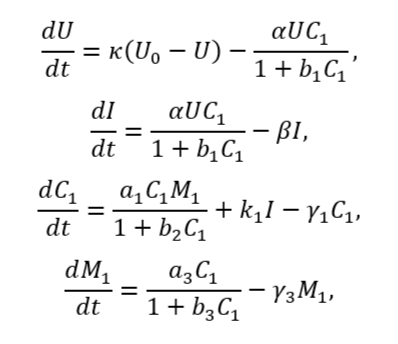


In [2]:
#Parameters of the model
kappa = 0.1
alpha = 0.2
b1 = 0.4
b2 = 0.4
b3 = 0.4
a1 = 0.1
k1 = 0.5
g1 = 0.2
g3 = 0.2
U0 = 2

beta = 0.5
a3=0.2

In [3]:
t=1000

In [4]:
#for accuracy
Q = np.zeros(100)
Step = np.zeros(100)
Step1 = np.zeros(100)

In [5]:
#number of points & steps
N1 = 10000
N2 = 11000

In [6]:
for n in range (0,100):
    #number of points & steps
    tau1 = t/N1
    tau2 = t/N2
    #arrays
    U1 = np.zeros([N1])
    I1 = np.zeros([N1])
    C1 = np.zeros([N1])
    M1 = np.zeros([N1])
    U2 = np.zeros([N2])
    I2 = np.zeros([N2])
    C2 = np.zeros([N2])
    M2 = np.zeros([N2])
    #initial
    U_0 = 2.0
    I_0 = 0.0
    M1_0 = 0.5
    C1_0 = 0.08
    U1[0] = U_0
    I1[0] = I_0
    M1[0] = M1_0
    C1[0] = C1_0
    U2[0] = U_0
    I2[0] = I_0
    M2[0] = M1_0
    C2[0] = C1_0
    #calculations
    for j in range(1,N1):
        U1[j] = tau1 * (kappa * (U0 - U1[j-1]) - (alpha * U1[j-1] * C1[j-1])/(1 + b1 * C1[j-1])) + U1[j-1]
        I1[j] = tau1 * ((alpha * U1[j-1] * C1[j-1])/(1 + b1 * C1[j-1]) - beta * I1[j-1]) + I1[j-1]
        C1[j] = tau1 * ((a1 * C1[j-1] * M1[j-1])/(1 + b2 * C1[j-1]) + k1 * I1[j-1] - g1 * C1[j-1]) + C1[j-1]
        M1[j] = tau1 * ((a3 * C1[j-1])/(1 + b3 * C1[j-1]) - g3 * M1[j-1]) + M1[j-1]
    for j in range(1,N2):
        U2[j] = tau2 * (kappa * (U0 - U2[j-1]) - (alpha * U2[j-1] * C2[j-1])/(1 + b1 * C2[j-1])) + U2[j-1]
        I2[j] = tau2 * ((alpha * U2[j-1] * C2[j-1])/(1 + b1 * C2[j-1]) - beta * I2[j-1]) + I2[j-1]
        C2[j] = tau2 * ((a1 * C2[j-1] * M2[j-1])/(1 + b2 * C2[j-1]) + k1 * I2[j-1] - g1 * C2[j-1]) + C2[j-1]
        M2[j] = tau2 * ((a3 * C2[j-1])/(1 + b3 * C2[j-1]) - g3 * M2[j-1]) + M2[j-1]
    #accuracy
    Abs = np.zeros([t])
    for k in range (0,t):
        Abs[k] = (abs(C1[int(N1*k/t)] - C2[int(N2*k/t)]))/C1[int(N1*k/t)]
    Q[n] = max(Abs)
    Step[n] = t/N2
    Step1[n] = N2
    #next
    N1+=1000
    N2+=1000

In [7]:
Q

array([5.24650875e-04, 4.34450877e-04, 3.65677921e-04, 3.12041536e-04,
       2.69402349e-04, 2.34945703e-04, 2.06703437e-04, 1.83265676e-04,
       1.63600970e-04, 1.46940598e-04, 1.32702150e-04, 1.20437836e-04,
       1.09798795e-04, 1.00509974e-04, 9.23521477e-05, 8.51488524e-05,
       7.87567505e-05, 7.30584379e-05, 6.79570103e-05, 6.33719121e-05,
       5.92357348e-05, 5.54917231e-05, 5.20918167e-05, 4.89950990e-05,
       4.61665597e-05, 4.35761004e-05, 4.11977300e-05, 3.90089104e-05,
       3.69900196e-05, 3.51239110e-05, 3.33955473e-05, 3.17916971e-05,
       3.03006802e-05, 2.89121550e-05, 2.76169380e-05, 2.64068518e-05,
       2.52745956e-05, 2.42136349e-05, 2.32181068e-05, 2.22827392e-05,
       2.14027801e-05, 2.05739379e-05, 1.97923287e-05, 1.90544302e-05,
       1.83570429e-05, 1.76972545e-05, 1.70724099e-05, 1.64800842e-05,
       1.59180594e-05, 1.53843034e-05, 1.48769514e-05, 1.43942903e-05,
       1.39347435e-05, 1.34968581e-05, 1.30792939e-05, 1.26808125e-05,
      

In [8]:
Step

array([0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
       0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ,
       0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
       0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ,
       0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
       0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667,
       0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
       0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571,
       0.01408451, 0.01388889, 0.01369863, 0.01351351, 0.01333333,
       0.01315789, 0.01298701, 0.01282051, 0.01265823, 0.0125    ,
       0.01234568, 0.01219512, 0.01204819, 0.01190476, 0.01176

In [9]:
N2

111000

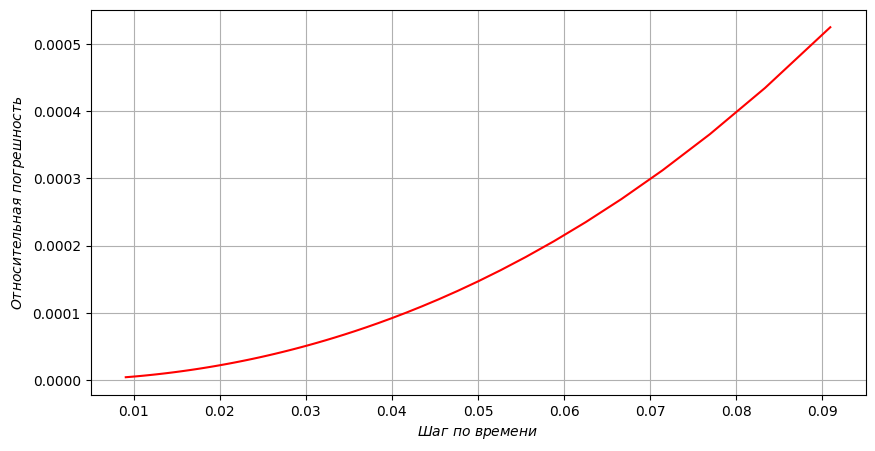

In [11]:
plt.figure(figsize=(10,5))
#plt.title("Dependence of C1 on beta with a3 = 0.2")

plt.plot(Step, Q, c = 'red')


plt.xlabel('$Шаг$ $по$ $времени$')
plt.ylabel('$Относительная$ $погрешность$')

plt.grid()
plt.show()

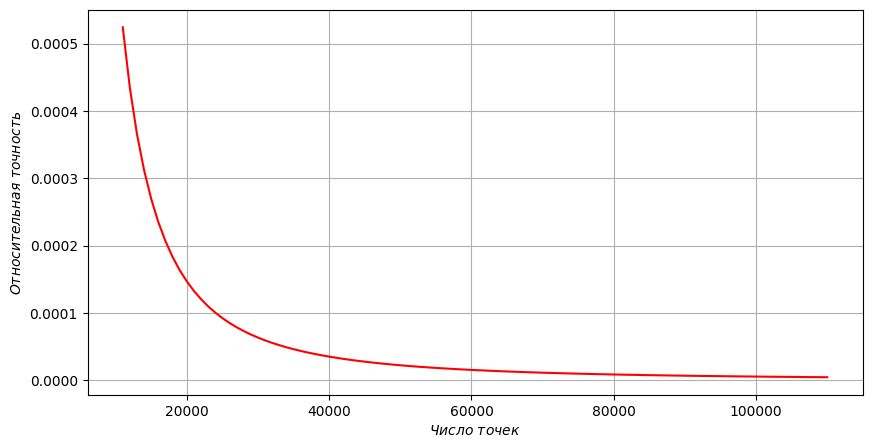

In [285]:
plt.figure(figsize=(10,5))

plt.plot(Step1, Q, c = 'red')


plt.xlabel('$Число$ $точек$')
plt.ylabel('$Относительная$ $точность$')

plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
#plt.title("Dependence of C1 on beta with a3 = 0.2")

plt.plot(Step1, Q, c = 'red')

points = np.array([-np.pi, -np.pi/2, 0,  np.pi/2, np.pi])
labels = [r'$0.09$', r'$\frac{\pi}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$']


plt.xlabel('$Число точек$')
plt.ylabel('$Относительная точность$')

plt.grid()
plt.show()